# <center>Cross-genre movies versus mono-genre movies</center>

<center>Wissem Belguidoum (wbelguidoum@gmail.com)</center>

<center>UCSanDiegoX : DSE200x</center>

<center>Mini-project Submission</center>


## Table of content : 
   1. <a href='#1.-Abstract'>Abstract</a>
   2. <a href='#2.-Data-loading'>Data loading</a> 
   3. <a href='#3.-Data-preparation'>Data preparation</a>
   4. <a href='#4.-Data-analysis'>Data analysis</a>
   5. <a href='#5.-Conclusions'>Conclusions</a>

## 1. Abstract
---

In this study, we are interested in analyzing the movielens data.

Our main objective is to understand whether the cross-genre movies (movies with more than one genre) attract more or less audience than the mono-genre movies

By the end of this analysis, the questions below will be discussed : 
   1. What is the global distribution of movie production regarding to their category (cross-genre or mono-genre)?
   2. What is the distribution of the **number** of ratings regarding to the movie's category (cross-genre or mono-genre)? 
   3. Under the light of the answers on the former questions, what advice we can give to the movie production industry in order to improve the audience of their future movies?

#### Assumption : 
Across this analysis, we will make the assumption that the number of ratings that a category gets, correlates positively with the number of audience that this category attracts, i.e, if a category (A) has 90% of the ratings and if the category (B) has only 10% of the ratings, then, we consider that the category (A) attracts more audience than the category (B)

## 2.  Data loading 
---

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import time


In [2]:
movies = pd.read_csv('movielens/movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('movielens/ratings.csv')
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


## 3. Data preparation
---

### Movies data

In [4]:
# Some movies are not associated with any genre:
print(movies[movies.genres == '(no genres listed)'].shape)

# We remove them : 
movies = movies[movies.genres != '(no genres listed)']

print(movies[movies.genres == '(no genres listed)'].shape)

(246, 3)
(0, 3)


In [5]:
# We add a column that counts the number of genre for each movie  : 
movies['genres_count'] = movies.genres.str.split('|').apply(lambda x : len(x))
movies.head(5)

,movieId,title,genres,genres_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [6]:
# We add a column that contains the category of the movie : 'cross' or 'mono' 
movies['category'] = movies.genres_count.apply(lambda x : 'mono' if x == 1 else 'cross')
movies.head(5)

,movieId,title,genres,genres_count,category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,cross
1,2,Jumanji (1995),Adventure|Children|Fantasy,3,cross
2,3,Grumpier Old Men (1995),Comedy|Romance,2,cross
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,cross
4,5,Father of the Bride Part II (1995),Comedy,1,mono


### Ratings data


In [7]:
# Droping superfluous columns
del ratings['userId']
del ratings['timestamp']

ratings.head(5)

,movieId,rating
0,2,3.5
1,29,3.5
2,32,3.5
3,47,3.5
4,50,3.5


In [8]:
# Enriching the ratings dataset by adding genres from the movies dataset :  
ratings = ratings.merge(movies, on='movieId')

# Droping unused columns 
del ratings['title']

ratings.head(5)

,movieId,rating,genres,genres_count,category
0,2,3.5,Adventure|Children|Fantasy,3,cross
1,2,3.0,Adventure|Children|Fantasy,3,cross
2,2,3.0,Adventure|Children|Fantasy,3,cross
3,2,3.0,Adventure|Children|Fantasy,3,cross
4,2,3.0,Adventure|Children|Fantasy,3,cross


# 4. Data Analysis


### Let's first take a look at the distribution of the movies across the two categories : 

In [9]:
# Lets group the movies dataset by category and show the ratio of movies for each category :
movies_total_count = movies.movieId.count()
movies_by_category = movies.groupby(['category']).movieId.agg(['count']) 
movies_by_category['ratio'] = movies_by_category['count'] * 100 / movies_total_count
movies_by_category.columns = ['movies_count', 'movies_ratio']

movies_by_category

,movies_count,movies_ratio
category,,
cross,16449,60.850104
mono,10583,39.149896


### Now, let's take a look at the ratings ratios, to see if they are compatible with the movies ratios :
N.B: We do not take into account the value of the rating, we are just interested in counting the number of ratings, as we made <a href='#Assumption-:'>the assumption</a> in the begining that a big number of ratings is an indicator that the movie is popular and have a big audience.

In [10]:
# We group the ratings by category and compute a ratio for each category : 
ratings_total_count = ratings.movieId.count()
ratings_by_category = ratings.groupby(['category']).rating.agg(['count'])
ratings_by_category['ratio'] = ratings_by_category['count'] * 100 / ratings_total_count
ratings_by_category.columns = ['ratings_count', 'ratings_ratio']

ratings_by_category

,ratings_count,ratings_ratio
category,,
cross,16622168,83.111247
mono,3377734,16.888753


### Let's merge the data and compare :  

In [11]:
# Merging the two results
data_by_category = ratings_by_category.merge(movies_by_category, on='category')

# Calculating a new column that contains the average number of rating received for each category : 
data_by_category['ratings_per_movie'] = data_by_category['ratings_count']/data_by_category['movies_count']

data_by_category

,ratings_count,ratings_ratio,movies_count,movies_ratio,ratings_per_movie
category,,,,,
cross,16622168,83.111247,16449,60.850104,1010.527570
mono,3377734,16.888753,10583,39.149896,319.166021


#### Observations : 
1. We notice that in terms of movie production, the cross-genre movies represent 60% of the total movies produced, and the remaining 40% are mono-genre movies.
2. We also notice that more than 83% of the total ratings given by users are directed towards cross-genre movies, while less than 17% of the ratings are given for the mono-genre movies.
3. In average, a cross-genre movie receives three times more ratings (&asymp;1011 rating per movie) than what a mono-genre movie receives (&asymp; 319 rating per movie)

TypeError: zip argument #2 must support iteration

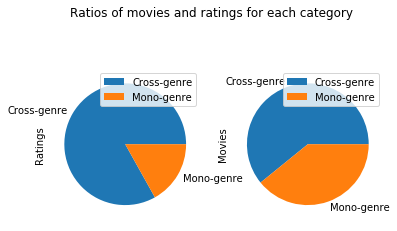

In [27]:
# Plotting the ratios
data_by_category.columns = ['# ratings', 'Ratings', '# movies', 'Movies', '# of ratings per Movie']
data_by_category.index= ['Cross-genre', 'Mono-genre'] 

plot1, plot2 = data_by_category.iloc[:,[1,3]].plot.pie(subplots=True,title='Ratios of movies and ratings for each category')
plot1.legend(False)
plt.show()

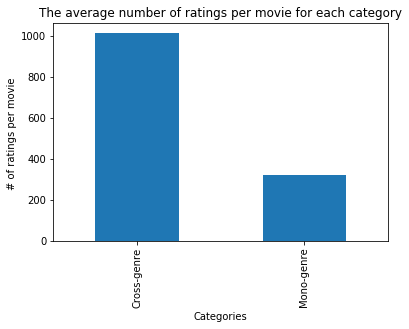

In [13]:
# Plotting the average number of ratings per movie
ax1 = data_by_category.iloc[:,[4]].plot.bar(legend=False, title='The average number of ratings per movie for each category')
ax1.set_xlabel('Categories')
ax1.set_ylabel('# of ratings per movie ')
ax1.tick_params(axis='y')

# 5. Conclusions
- Cross-genre movies attract more audience (see <a href='#Assumption-:'>the assumption above</a>), and thus, are more profitable.
- The movie production industry produces more cross-genre movies than the mono-genre movies, but this production is still not balanced enough to represent the expectations of the audience.  
- We still need to dive deeper into the data to confirm or to infirm these findings and to draw more precise conclusions on which combination of genres could be more interesting to the audience and more profitable.
